# Sex

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

Clean up the csv

In [3]:
sex = pd.read_excel('../Data/Census_2023_AgeSexEstimates_forVA_0.xlsx', skiprows = 4)

In [4]:
sex.head()

,Locality,Locality FIPS Code,Total,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,60 to 64 years .2,65 to 69 years .2,70 to 74 years .2,75 to 79 years .2,80 to 84 years .2,85 years and over .2,Under 18 years.2,18 to 64 years.2,18 years and over.2,65 years and over.2
0,Virginia,NaN,8715698,485946,523016,533403,568664,572124,568819,602468,...,284367,255460,211227,161581,102288,94940,916782,2667419,3492915,825496
1,Accomack County,1.0,33239,1708,1779,1990,1959,1614,1540,1792,...,1383,1561,1213,955,556,464,3289,8859,13608,4749
2,Albemarle County,3.0,115676,5520,6371,6191,9832,7484,7032,7348,...,3918,3957,3438,2613,1786,1980,10816,35538,49312,13774
3,Alleghany County,5.0,14595,547,724,784,809,736,827,769,...,577,605,489,458,287,277,1240,4069,6185,2116
4,Amelia County,7.0,13480,745,776,770,766,653,776,799,...,592,483,384,282,207,158,1317,3929,5443,1514


In [6]:
sex = sex.drop(0)
sex.head()

,Locality,Locality FIPS Code,Total,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,60 to 64 years .2,65 to 69 years .2,70 to 74 years .2,75 to 79 years .2,80 to 84 years .2,85 years and over .2,Under 18 years.2,18 to 64 years.2,18 years and over.2,65 years and over.2
1,Accomack County,1.0,33239,1708,1779,1990,1959,1614,1540,1792,...,1383,1561,1213,955,556,464,3289,8859,13608,4749
2,Albemarle County,3.0,115676,5520,6371,6191,9832,7484,7032,7348,...,3918,3957,3438,2613,1786,1980,10816,35538,49312,13774
3,Alleghany County,5.0,14595,547,724,784,809,736,827,769,...,577,605,489,458,287,277,1240,4069,6185,2116
4,Amelia County,7.0,13480,745,776,770,766,653,776,799,...,592,483,384,282,207,158,1317,3929,5443,1514
5,Amherst County,9.0,31396,1571,1799,1729,1887,1902,1744,1922,...,1260,1127,987,769,566,466,2982,9416,13331,3915


In [7]:
gdf = gpd.read_file('../Data/VA_Jurisdictions/VA_Jurisdictions.shp')
gdf.head()

,OBJECTID,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,AREASQMI,LASTUPDATE,JURISTYPE,STCOFIPS,...,CODE_DISTR,DISTRICT,CLASS_FP,VDOT_CODE,JURIS_CODE,RNS_FIPS_C,AMS_FIPS_C,Shape__Are,Shape__Len,geometry
0,1,1674630,Montgomery,Montgomery County,L,Y,614.317200,2021-09-23,CO,51121,...,2,Salem,H1,060,060,060,121,1.591074e+09,238285.910698,"MULTIPOLYGON (((-8941584.662 4490539.094, -894..."
1,2,1497573,Russell,Russell County,V,N,747.130895,2014-09-24,CO,51167,...,1,Bristol,H1,083,083,083,167,1.935060e+09,250387.957924,"POLYGON ((-9103768.661 4433341.817, -9103809.2..."
2,3,1502770,Henry,Henry County,T,N,598.833273,2021-09-23,CO,51089,...,2,Salem,H1,044,044,044,089,1.550971e+09,227443.648406,"POLYGON ((-8866137.692 4416041.284, -8866198.0..."
3,4,1480136,King and Queen,King and Queen County,T,N,522.488044,2017-06-23,CO,51097,...,6,Fredericksburg,H1,049,049,049,097,1.353238e+09,298730.097281,"POLYGON ((-8533092.708 4523518.287, -8533094.4..."
4,5,1494354,Floyd,Floyd County,V,N,598.554777,2021-09-23,CO,51063,...,2,Salem,H1,031,031,031,063,1.550250e+09,234994.467427,"POLYGON ((-8919821.406 4456253.01, -8919740.25..."


In [8]:
def clean_name(name):
    name = name.lower()
    name = name.replace('city of ', '')
    name = name.replace('city', '')
    name = name.replace('town of ', '')
    name = name.replace('town', '')
    return name

sex['Locality'] = sex['Locality'].apply(clean_name)
gdf['NAMELSAD'] = gdf['NAMELSAD'].apply(clean_name)

In [10]:
sex['Male Ratio'] = sex['Male'] / sex['Total']
sex['Male Ratio'][:5]

1    0.491651
2    0.480203
3    0.491264
4    0.498516
5    0.480412
Name: Male Ratio, dtype: float64

In [11]:
merged_gdf = sex.merge(gdf, left_on="Locality", right_on="NAMELSAD", how="right")
merged_gdf = merged_gdf.dropna(subset=['Locality'])
merged_gdf

,Locality,Locality FIPS Code,Total,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,CODE_DISTR,DISTRICT,CLASS_FP,VDOT_CODE,JURIS_CODE,RNS_FIPS_C,AMS_FIPS_C,Shape__Are,Shape__Len,geometry
0,montgomery county,121.0,98666.0,3481.0,4152.0,4388.0,11885.0,18322.0,6452.0,5632.0,...,2,Salem,H1,060,060,060,121,1.591074e+09,238285.910698,"MULTIPOLYGON (((-8941584.662 4490539.094, -894..."
1,russell county,167.0,25477.0,1304.0,1306.0,1405.0,1330.0,1270.0,1387.0,1440.0,...,1,Bristol,H1,083,083,083,167,1.935060e+09,250387.957924,"POLYGON ((-9103768.661 4433341.817, -9103809.2..."
2,henry county,89.0,49702.0,2071.0,2572.0,2930.0,2914.0,2576.0,2534.0,2638.0,...,2,Salem,H1,044,044,044,089,1.550971e+09,227443.648406,"POLYGON ((-8866137.692 4416041.284, -8866198.0..."
3,king and queen county,97.0,6720.0,305.0,307.0,326.0,317.0,336.0,392.0,373.0,...,6,Fredericksburg,H1,049,049,049,097,1.353238e+09,298730.097281,"POLYGON ((-8533092.708 4523518.287, -8533094.4..."
4,floyd county,63.0,15679.0,674.0,781.0,875.0,876.0,728.0,784.0,827.0,...,2,Salem,H1,031,031,031,063,1.550250e+09,234994.467427,"POLYGON ((-8919821.406 4456253.01, -8919740.25..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,galax,640.0,6717.0,532.0,466.0,502.0,461.0,385.0,409.0,407.0,...,2,Salem,C7,113,113,113,640,3.442897e+07,39550.351956,"POLYGON ((-9004748.107 4396809.71, -9004585.69..."
129,manassas park,685.0,16361.0,812.0,1075.0,1059.0,1143.0,1144.0,1304.0,1259.0,...,9,Northern Virginia,C7,152,152,152,685,1.292172e+07,28873.861605,"MULTIPOLYGON (((-8623926.68 4691375.435, -8623..."
130,prince william county,153.0,489640.0,32335.0,35828.0,36462.0,36013.0,31238.0,30045.0,31778.0,...,9,Northern Virginia,H1,076,076,076,153,1.478571e+09,294991.359628,"MULTIPOLYGON (((-8643098.151 4713476.58, -8643..."
131,goochland county,75.0,27197.0,1085.0,1133.0,1340.0,1346.0,1347.0,1322.0,1491.0,...,4,Richmond,H1,037,037,037,075,1.204904e+09,214765.311631,"POLYGON ((-8689152.949 4565886.216, -8689108.7..."


In [12]:
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry="geometry", crs=gdf.crs)

<Axes: >

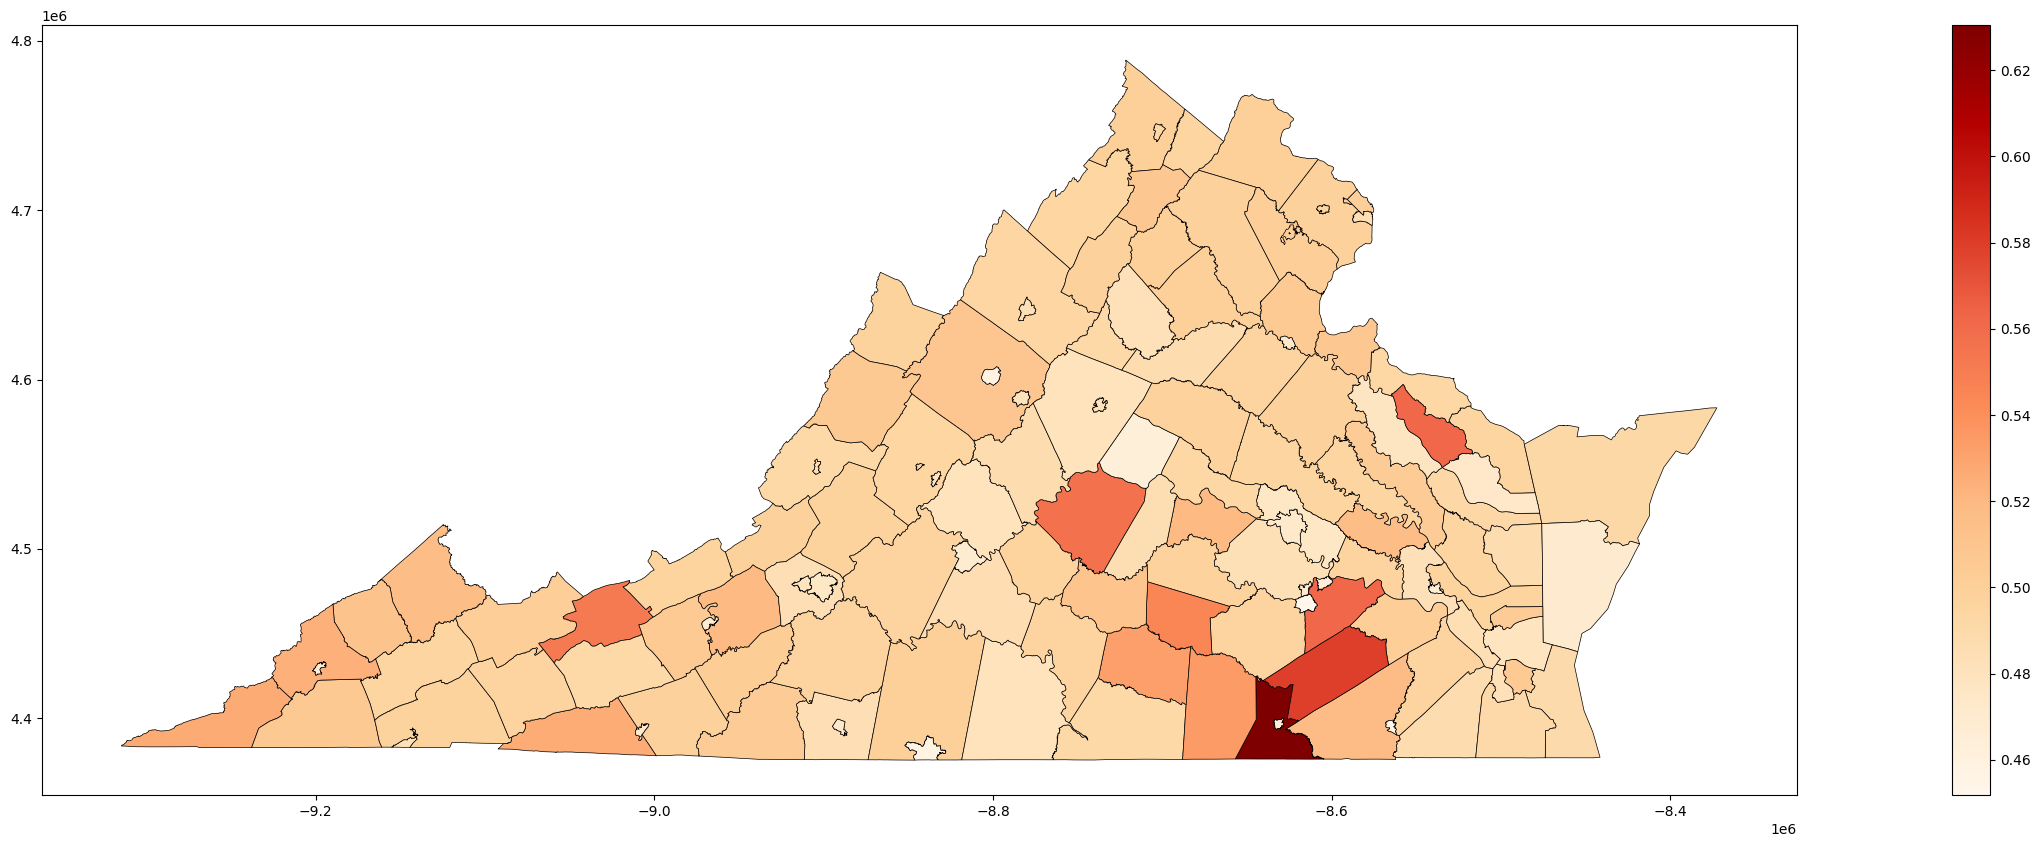

In [13]:
fig, ax = plt.subplots(figsize=(40, 10))
merged_gdf.plot(
    column='Male Ratio',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)